<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/27_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [5]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [29]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<ipython-input-31-a1729e694feb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


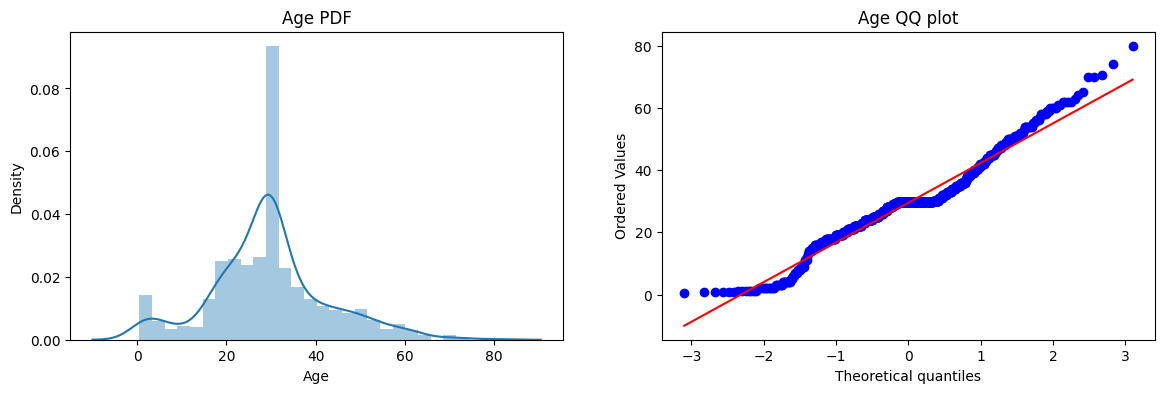

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')



plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

In [32]:
trf = FunctionTransformer(func=np.log1p)

In [33]:
x_train_transformed=trf.fit_transform(X_train)
x_test_transformed=trf.fit_transform(X_test)

In [34]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [44]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [45]:
x2_train_transformed=trf2.fit_transform(X_train)

In [49]:
x2_train_transformed[:,0]

array([3.38439026, 2.63905733, 2.18885633, 2.18089192, 3.47429294,
       5.51552654, 3.31600254, 3.3576216 , 2.18557926, 3.59731226,
       2.63905733, 3.2248579 , 2.58588257, 2.08619369, 2.35137526,
       3.29583687, 4.51085951, 5.43164561, 2.63905733, 4.06044301,
       3.47429294, 1.97927584, 2.26825241, 3.30505352, 2.35967406,
       2.1076888 , 3.15095238, 2.34978351, 4.79579055, 2.73814608,
       2.20276476, 5.35894199, 2.1102132 , 4.51085951, 2.16619247,
       3.27588734, 3.09444575, 3.4339872 , 4.13323189, 3.29583687,
       2.1102132 , 2.18557926, 2.63905733, 3.05459063, 3.44998755,
       2.08567209, 2.74084002, 2.14251023, 5.02749241, 3.29583687,
       2.18885633, 3.09104245, 5.57357887, 2.1690537 , 2.1076888 ,
       2.26825241, 2.17190677, 4.39444915, 2.38339981, 5.43164561,
       2.59151638, 0.        , 3.29583687, 2.1071783 , 2.26825241,
       2.00653477, 2.35137526, 2.20276476, 2.18557926, 2.1102132 ,
       3.44998755, 2.60083612, 3.29583687, 2.1690537 , 2.10768

<ipython-input-52-6aeb741984fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x2_train_transformed)


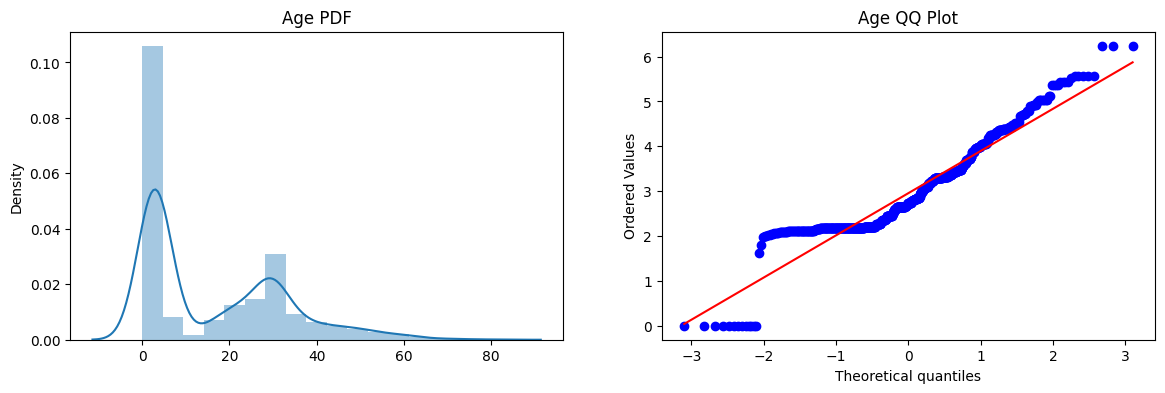

In [52]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x2_train_transformed)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x2_train_transformed[:,0], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()